In [ ]:
import pandas as pd # biblioteka do działań na danych w postaci tabelarycznej
import matplotlib.pyplot as plt
import seaborn as sns # druga biblioteka do wykresów
import numpy as np

In [ ]:
data = pd.read_excel('Zawór sterujący 2001- 1 godzina.xls')
data

,Czas [s],P1[kPa],P2[kPa],T[C],F[m^3/h],CV[%],X[%],PV[%],deltaP[kPa],sqdP
0,0,665.689866,342.857143,96.715507,350.427350,35.506716,34.822955,48.840049,322.832723,17.967546
1,1,654.212454,344.078144,96.764347,350.915751,34.603175,34.700855,49.157509,310.134310,17.610631
2,2,652.258852,347.496947,96.764347,357.387057,35.018315,34.310134,49.206349,304.761905,17.457431
3,3,651.282051,349.938950,96.715507,358.974359,35.262515,34.261294,49.792430,301.343101,17.359237
4,4,654.212454,347.252747,96.764347,359.584860,36.092796,33.406593,49.987790,306.959707,17.520266
...,...,...,...,...,...,...,...,...,...,...
3596,3596,634.676435,356.532357,96.617827,368.742369,34.090354,32.918193,49.084249,278.144078,16.677652
3597,3597,640.781441,353.601954,96.593407,368.498168,33.455433,33.528694,48.888889,287.179487,16.946371
3598,3598,638.827839,355.311355,96.593407,367.155067,34.188034,33.382173,49.181929,283.516484,16.837948
3599,3599,637.851038,347.496947,96.593407,367.155067,33.919414,33.137973,49.035409,290.354091,17.039780


In [ ]:
data1 = data[data.index < 1800]
data1

,Czas [s],P1[kPa],P2[kPa],T[C],F[m^3/h],CV[%],X[%],PV[%],deltaP[kPa],sqdP
0,0,665.689866,342.857143,96.715507,350.427350,35.506716,34.822955,48.840049,322.832723,17.967546
1,1,654.212454,344.078144,96.764347,350.915751,34.603175,34.700855,49.157509,310.134310,17.610631
2,2,652.258852,347.496947,96.764347,357.387057,35.018315,34.310134,49.206349,304.761905,17.457431
3,3,651.282051,349.938950,96.715507,358.974359,35.262515,34.261294,49.792430,301.343101,17.359237
4,4,654.212454,347.252747,96.764347,359.584860,36.092796,33.406593,49.987790,306.959707,17.520266
...,...,...,...,...,...,...,...,...,...,...
1795,1795,638.339438,350.427350,96.642247,368.131868,33.089133,33.186813,49.377289,287.912088,16.967972
1796,1796,630.036630,356.776557,96.642247,371.916972,33.553114,32.625153,49.499389,273.260073,16.530580
1797,1797,628.815629,348.473748,96.666667,374.603175,33.406593,32.869353,49.230769,280.341881,16.743413
1798,1798,628.571429,356.043956,96.642247,374.847375,33.308913,32.625153,49.768010,272.527473,16.508406


In [ ]:
dP = data1['deltaP[kPa]'].to_numpy()
N1 = min(dP)
S1 = (max(dP)+min(dP))/2
P1 = max(dP)

In [ ]:
X = data1['X[%]'].to_numpy()
N2 = min(X)
S2 = (max(X)+min(X))/2
P2 = max(X)

In [ ]:
Y = data1['F[m^3/h]'].to_numpy()
N3 = min(Y)
S3 = (max(Y)+min(Y))/2
P3 = max(Y)

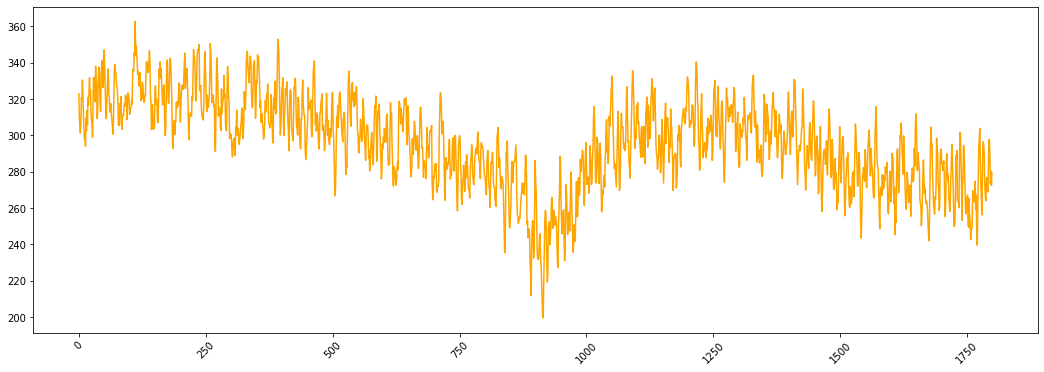

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(dP, 'orange')
plt.xticks(rotation=45);

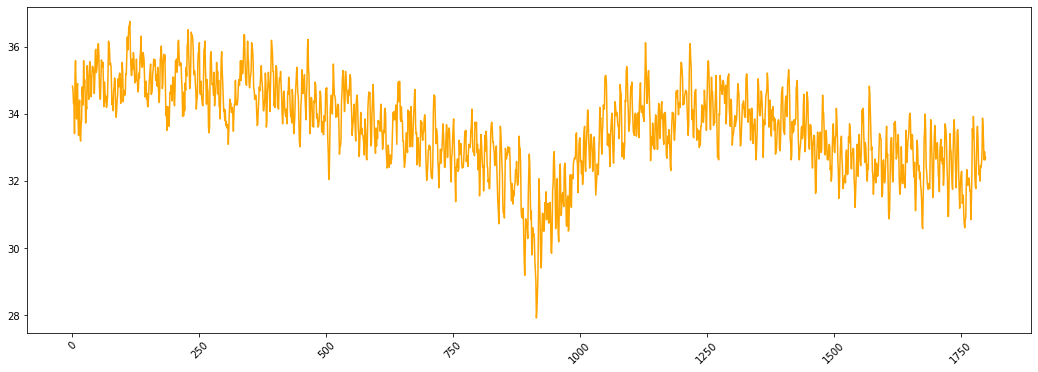

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(X, 'orange')
plt.xticks(rotation=45);

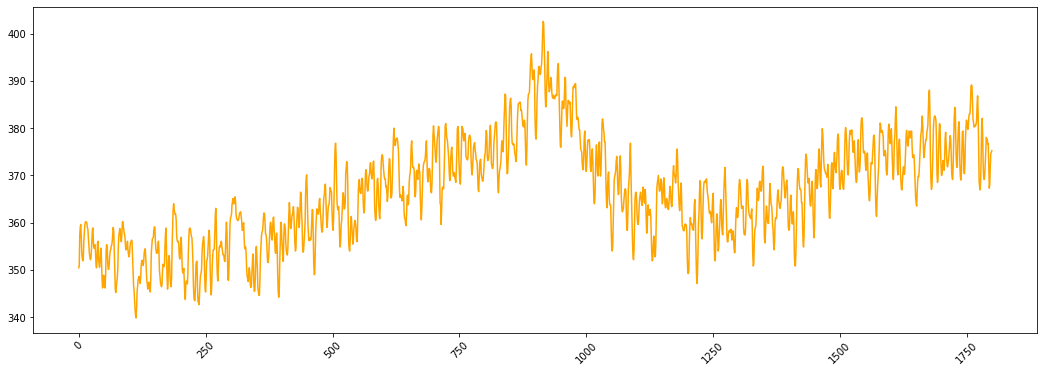

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(Y, 'orange')
plt.xticks(rotation=45);

In [ ]:
#listy punktow char. dla wykresow przynaleznosci
X1 = [N1 , S1 , P1]
X1

[199.51159899999993, 281.074481, 362.637363]

In [ ]:
X2 = [N2 , S2 , P2]
X2

[27.912088, 32.3321125, 36.752137]

In [ ]:
W = [N3 , S3 , P3]
W

[339.80464, 371.1843715, 402.564103]

In [ ]:
#boki rosnace strefy przynależności
def bokR(x1,x2,x):
  a = (0-1)/(x1-x2)
  b = 1 - a*x2
  return a*x + b
#boki malejace strefy przynależności
def bokM(x1,x2,x):
  a = (1-0)/(x1-x2)
  b = 0 - a*x2
  return a*x + b

In [ ]:
def szukaj_punktow(dane ,bokR,bokM, granice):
  wagi = [3]*1800
  rejony = [3]*1800

  for j in range(len(dane)):
    i = 0
    while i < 2:
      bR = bokR(granice[i],granice[i+1],dane[j])
      bM = bokM(granice[i],granice[i+1],dane[j])
      if (bR >= 0 and bR) <= 1 or (bM >= 0 and bM <= 1):
        if bM > bR and bM <=1 and bM >= 0:
          wagi[j] = bM
          if i == 0:
            rejony[j] = "N"
          if i == 1:
            rejony[j] = "S"

        elif bR > bM and bR <=1 and bR >= 0:
          wagi[j] = bR
          if i == 0:
            rejony[j] = "S"
          if i == 1:
            rejony[j] = "P"
      i += 1
  return wagi , rejony

In [ ]:
#szukanie mniejszych wartosci
def szukaj_mniejszych(dane ,bokR,bokM, granice):
  wagi = [3]*1800
  rejony = [3]*1800
  
  for j in range(len(dane)):
    i = 0
    while i < 2:
      bR = bokR(granice[i],granice[i+1],dane[j])
      bM = bokM(granice[i],granice[i+1],dane[j])
      if bR >= 0 and bR <= 1 or bM >= 0 and bM <= 1:
        if bM > bR and bR <=1 and bR >= 0:
          wagi[j] = bR
          if i == 0:
            rejony[j] = "S"
          if i == 1:
            rejony[j] = "P"
            
        elif bR > bM and bM <=1 and bM >= 0:
          wagi[j] = bM
          if i == 0:
            rejony[j] = "N"
          if i == 1:
            rejony[j] = "S"
      i += 1
  return wagi , rejony

In [ ]:
FdP ,RdP = szukaj_punktow(dP,bokR,bokM,X1)
mFdP ,mRdP = szukaj_mniejszych(dP,bokR,bokM,X1)
FX ,RX = szukaj_punktow(X,bokR,bokM,X2)
mFX ,mRX = szukaj_mniejszych(X,bokR,bokM,X2)
print(" Wartości wieksze dP ")
print(FdP)
print(RdP)
print(" Wartości mniejsze dP ")
print(mFdP)
print(mRdP)
print(" Wartości wieksze X ")
print(FX)
print(RX)
print(" Wartości mniejsze X ")
print(mFX)
print(mRX)

 Wartości wieksze dP 
[0.5119760481244402, 0.6437125774932775, 0.7095808360474551, 0.7514970106132339, 0.6826347308325866, 0.5149700570904296, 0.5329341231468501, 0.6047904241539674, 0.5089820391584499, 0.6257485114368566, 0.7245508931378857, 0.7904191639525449, 0.7694610766696548, 0.8413173654162924, 0.6526946166517265, 0.736526941262325, 0.6017964029274978, 0.7005987968890066, 0.5119760481244398, 0.5628742495881882, 0.5329341354073298, 0.6197604689839187, 0.5000000000000004, 0.5389221533393087, 0.6197604812443971, 0.6676646737421565, 0.7065868270814661, 0.7814371247940954, 0.5359281443733197, 0.6227544902103865, 0.565868258554179, 0.5299401141808602, 0.5419161745657788, 0.6976047879230167, 0.595808384995518, 0.5568862193957305, 0.6556886256177159, 0.6167664722784081, 0.5838323368710787, 0.661676643549697, 0.6916167699910352, 0.5568862193957305, 0.5838323368710787, 0.6077844331199573, 0.6407185562668074, 0.7065868270814661, 0.7365269412623254, 0.6107784420859472, 0.5538922104297401, 0

In [ ]:
#print(pomo)
#print(wX1)
#print(wX2)

In [ ]:
#Testowanie wartości metodą prób i błędów :)
g = []
f = 0
pomo = 390
wX1 = 0
wX2 = 0
mX1 = 0
mX2 = 0
#0*dP[i] + -0.1*X[i] + 400.4 -
for i in range(len(FdP)):
  if RdP[i] == 'N' and RX[i] == 'N':
    f = Y[i] - (-0.018*dP[i] + 398.979)
    g.append(f)
    if abs(f) < abs(pomo):
      pomo = f
      wX1 = FdP[i]
      wX2 = FX[i]
      mX1 = mFdP[i]
      mX2 = mFX[i]
print(np.average(g))
print(g)
print(pomo)
print(mX1)
print(mX2)

0.0002716697647295351
[-1.6373641499999962, -0.2962159839999572, 0.9980454480000276, -4.575581424000006, -1.8761916240000005, -1.8639817319999565, -1.5250312759999929, 0.8588509440000394, 4.978508782000063, 7.237850254000023, 7.1968239780000545, 3.44004744800003, -5.858120877999966, -3.0903552579999882, 1.249082814000019, -3.747254059999989, -1.484494896000001]
-0.2962159839999572
0.149700607685737
0.2872927514315817


LISTA REGUŁ
1. x1 = N , x2 = N => y = -0.018*x1 + 398.979 (0.7127072485684183)
2. x1 = N , x2 = S => y = -0.7*x2 + 410.465  (0.6047904241539661)
3. x1 = N , x2 = P => y = (???)
4. x1 = S , x2 = N => y = (???)
5. x1 = S , x2 = S => y = -0.12*x2 + 374.437(0.7734807804798356)
6. x1 = S , x2 = P => y = -0.016*x1 + 360.678(0.5138121971948353)
7. x1 = P , x2 = N => y = (???)
8. x1 = P , x2 = S => y = -0.18*x2 + 362.699(0.5082872278196637)
9. x1 = P , x2 = P => y = -0.011*x1 + 355.136(0.629834178520956)


In [ ]:
#defuzyfikacja
def defuz(dP, RdP, X, RX):
  miny =[0.7127072485684183,0.6047904241539661,0.7734807804798356,0.5138121971948353,0.5082872278196637,0.629834178520956]
  minya =[0.149700607685737,0.27624315204587635,0.08982036706353824,0.4101796451969424,0.4730538947851306,0.370165821479044]

  defuzz = [0]*1800
  licz= [0]*1800
  mian = [0]*1800
  mianownik = 0
  licznik = 0

  for i in range(len(dP)):
    licznik += miny[0]*(-0.018*dP[i] + 398.979)
    mianownik += miny[0]


    licznik += miny[1]*(-0.7*X[i] + 410.465)
    mianownik += miny[1]
  

    licznik += miny[2]*(-0.12*X[i] + 374.437)
    mianownik += miny[2]


    licznik += miny[3]*(-0.016*dP[i] + 360.678)
    mianownik += miny[3]


    licznik += miny[4]*(-0.18*X[i] + 362.699)
    mianownik += miny[4]


    licznik += miny[5]*(-0.011*dP[i] + 355.136)
    mianownik += miny[5]
  

    defuzz[i] = licznik/mianownik
    mian[i] = mianownik
    licz[i] = licznik
    mianownik = 0
    licznik = 0
    
  return defuzz, mian ,licz
  


  

ostre, mian ,licz = defuz(dP, RdP, X, RX)
print(ostre)
print(licz)
print(mian)

[370.13436377451063, 370.2491061348528, 370.3526979871445, 370.38618239870283, 370.48295973536045, 370.10321701356776, 370.03884181846456, 370.0738126170279, 370.29477302785637, 370.23815390066443, 370.2666744559378, 370.481274919618, 370.5438247361274, 370.4845541075608, 370.3021575339977, 370.5237456313945, 370.4693559997976, 370.4542658772295, 370.3115152336356, 370.18396269033, 370.1731258706883, 370.1598361557096, 370.01876272120666, 370.1219000124875, 370.18296344199183, 370.27956749074167, 370.44602284795155, 370.40047153184497, 370.2745785085768, 369.9677101509136, 370.06979032049514, 370.11548235432844, 370.2306541423266, 369.9577571650634, 369.9643153785989, 370.0554434763422, 370.1890095458558, 370.26439452380805, 370.05487348583495, 369.94794489693976, 369.9296911633258, 370.01976213936996, 370.14123600115545, 370.2430600309888, 370.02019140467576, 369.84523687096475, 369.8190539588319, 370.0067283868394, 370.02555210348584, 369.91018188675014, 369.76731582113456, 369.82780

In [ ]:
#defuzyfikacja
def defuz2(dP,mFdP, RdP,mRdP, X, RX,mRX,mFX):
  miny =[0.7127072485684183,0.6047904241539661,0.7734807804798356,0.5138121971948353,0.5082872278196637,0.629834178520956]
  minya =[0.149700607685737,0.27624315204587635,0.08982036706353824,0.4101796451969424,0.4730538947851306,0.370165821479044]

  defuzz = [0]*1800
  licz= [0]*1800
  mian = [0]*1800
  mianownik = 0
  licznik = 0

  for i in range(len(dP)):
    if (RdP[i] == 'N' and RX[i] == 'N') or (mRdP[i] == 'N' and RX[i] == 'N') or (mRdP[i] == 'N' and mRX[i] == 'N') or (RdP[i] == 'N' and mRX[i] == 'N'):
      if RdP[i] == 'N' and RX[i] == 'N':
        mianownik += min(FdP[i],FX[i])
        licznik += min(FdP[i],FX[i])*(-0.018*dP[i] + 398.979)
      if mRdP[i] == 'N' and RX[i] == 'N':
        mianownik += mFdP[i]
        licznik += mFdP[i]*(-0.018*dP[i] + 398.979)
      if RdP[i] == 'N' and mRX[i] == 'N':
        mianownik += mFX[i]
        licznik += mFX[i]*(-0.018*dP[i] + 398.979)
      if mRdP[i] == 'N' and mRX[i] == 'N':
        mianownik += min(mFdP[i],mFX[i])
        licznik += min(mFdP[i],mFX[i])*(-0.018*dP[i] + 398.979)

    if (RdP[i] == 'N' and RX[i] == 'S') or (mRdP[i] == 'N' and RX[i] == 'S') or (mRdP[i] == 'N' and mRX[i] == 'S') or (RdP[i] == 'N' and mRX[i] == 'S'):
      if RdP[i] == 'N' and RX[i] == 'S':
        mianownik += min(FdP[i],FX[i])
        licznik += min(FdP[i],FX[i])*(-0.7*X[i] + 410.465)
      if mRdP[i] == 'N' and RX[i] == 'S':
        mianownik += mFdP[i]
        licznik += mFdP[i]*(-0.7*X[i] + 410.465)
      if RdP[i] == 'N' and mRX[i] == 'S':
        mianownik += mFX[i]
        licznik += mFX[i]*(-0.7*X[i] + 410.465)
      if mRdP[i] == 'N' and mRX[i] == 'S':
        mianownik += min(mFdP[i],mFX[i])
        licznik += min(mFdP[i],mFX[i])*(-0.7*X[i] + 410.465)
  
    if (RdP[i] == 'S' and RX[i] == 'S') or (mRdP[i] == 'S' and RX[i] == 'S') or (mRdP[i] == 'S' and mRX[i] == 'S') or (RdP[i] == 'S' and mRX[i] == 'S'):
      if RdP[i] == 'S' and RX[i] == 'S':
        mianownik += min(FdP[i],FX[i])
        licznik += min(FdP[i],FX[i])*(-0.12*X[i] + 374.437)
      if mRdP[i] == 'S' and RX[i] == 'S':
        mianownik += mFdP[i]
        licznik += mFdP[i]*(-0.12*X[i] + 374.437)
      if RdP[i] == 'S' and mRX[i] == 'S':
        mianownik += mFX[i]
        licznik += mFX[i]*(-0.12*X[i] + 374.437)
      if mRdP[i] == 'S' and mRX[i] == 'S':
        mianownik += min(mFdP[i],mFX[i])
        licznik += min(mFdP[i],mFX[i])*(-0.12*X[i] + 374.437)

    if (RdP[i] == 'S' and RX[i] == 'P') or (mRdP[i] == 'S' and RX[i] == 'P') or (mRdP[i] == 'S' and mRX[i] == 'P') or (RdP[i] == 'S' and mRX[i] == 'P'):
      if RdP[i] == 'S' and RX[i] == 'P':
        mianownik += min(FdP[i],FX[i])
        licznik += min(FdP[i],FX[i])*(-0.016*dP[i] + 360.678)
      if mRdP[i] == 'S' and RX[i] == 'P':
        mianownik += mFdP[i]
        licznik += mFdP[i]*(-0.016*dP[i] + 360.678)
      if RdP[i] == 'S' and mRX[i] == 'P':
        mianownik += mFX[i]
        licznik += mFX[i]*(-0.016*dP[i] + 360.678)
      if mRdP[i] == 'S' and mRX[i] == 'P':
        mianownik += min(mFdP[i],mFX[i])
        licznik += min(mFdP[i],mFX[i])*(-0.016*dP[i] + 360.678)

    if (RdP[i] == 'P' and RX[i] == 'S') or (mRdP[i] == 'P' and RX[i] == 'S') or (mRdP[i] == 'P' and mRX[i] == 'S') or (RdP[i] == 'P' and mRX[i] == 'S'):
      if RdP[i] == 'P' and RX[i] == 'S':
        mianownik += min(FdP[i],FX[i])
        licznik += min(FdP[i],FX[i])*(-0.18*X[i] + 362.699)
      if mRdP[i] == 'P' and RX[i] == 'S':
        mianownik += mFdP[i]
        licznik += mFdP[i]*(-0.18*X[i] + 362.699)
      if RdP[i] == 'P' and mRX[i] == 'S':
        mianownik += mFX[i]
        licznik += mFX[i]*(-0.18*X[i] + 362.699)
      if mRdP[i] == 'P' and mRX[i] == 'S':
        mianownik += min(mFdP[i],mFX[i])
        licznik += min(mFdP[i],mFX[i])*(-0.18*X[i] + 362.699)

    if (RdP[i] == 'P' and RX[i] == 'P') or (mRdP[i] == 'P' and RX[i] == 'P') or (mRdP[i] == 'P' and mRX[i] == 'P') or (RdP[i] == 'P' and mRX[i] == 'P'):
      if RdP[i] == 'P' and RX[i] == 'P':
        mianownik += min(FdP[i],FX[i])
        licznik += min(FdP[i],FX[i])*(-0.011*dP[i] + 355.136)
      if mRdP[i] == 'P' and RX[i] == 'P':
        mianownik += mFdP[i]
        licznik += mFdP[i]*(-0.011*dP[i] + 355.136)
      if RdP[i] == 'P' and mRX[i] == 'P':
        mianownik += mFX[i]
        licznik += mFX[i]*(-0.011*dP[i] + 355.136)
      if mRdP[i] == 'P' and mRX[i] == 'P':
        mianownik += min(mFdP[i],mFX[i])
        licznik += min(mFdP[i],mFX[i])*(-0.011*dP[i] + 355.136)
  
    if mianownik != 0:
      defuzz[i] = licznik/mianownik
    mian[i] = mianownik
    licz[i] = licznik
    mianownik = 0
    licznik = 0
    
  return defuzz, mian ,licz
  

ostre, mian ,licz = defuz2(dP,mFdP, RdP,mRdP, X, RX,mRX,mFX)
print(ostre)
print(licz)
print(mian)

[358.08923596161, 358.98360776983293, 360.2700217282265, 360.7455697326242, 362.04181441912476, 357.74809138687493, 357.0215716461616, 357.6852341076895, 359.37690225290186, 358.8723921527261, 359.11877875633303, 362.17335974357474, 363.0204008517864, 362.3730721604107, 359.6317312510647, 362.6959665043969, 361.8323956100179, 361.60979237502096, 359.5991977456006, 358.334530272958, 358.3290860920801, 358.010196764503, 356.91295415210817, 358.05007695213635, 358.220259326608, 359.3385934075521, 361.5086722636518, 360.9779476318814, 359.2905909363647, 356.8003546221718, 357.6649669785958, 357.97442603036836, 358.89083120332634, 356.7573279117129, 356.6490815940918, 357.50260903763456, 358.225227947998, 359.1978448208067, 357.5777946160963, 356.7270300433242, 356.6359705964007, 357.136317401277, 357.9131251771991, 358.9532522347481, 357.3096162976817, 355.5695816216764, 355.33959050943713, 357.18586544102095, 357.1881141123761, 356.42486042296673, 354.9542479575352, 355.09101856517304, 35

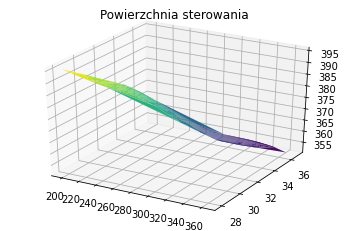

In [ ]:
#powierzchnia sterowania F !
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x1 = dP
x2 = X
y = ostre

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x1,x2,y,linewidth=0.2, antialiased=True, cmap='viridis')
ax.set_title('Powierzchnia sterowania')
plt.show()

In [ ]:
import cmath
bladB = [0]*1800
bladW = [0]*1800
s = 0
for k in range(1800):
  s = ostre[k] - Y[k]
  if ostre[k] == 0 or Y[k] == 0:
    s = bladB[k-1]
  bladB[k] = s
  bladW[k] = s*100/max(Y)
  s = 0

print(bladB)
print(bladW)

[7.661885961609983, 8.067856769832929, 2.8829647282264546, 1.7712107326241835, 2.45695441912477, 0.8494343868749183, 3.5417186461615984, 5.182181107689473, 7.484350252901834, 6.36933915272607, 3.074822756333049, 4.542101743574733, 3.5576418517864, 2.2998121604106814, -0.5636287489352867, 2.622706504396888, 1.8812356100178818, 2.635433375020966, 0.9911387456005514, 1.4358732729579629, 3.384031092080079, 4.530343764503016, 4.287801152108159, 5.91332495213635, 5.839307326608036, 5.2482394075520915, 4.976315263651827, 2.3698886318813948, 0.4383319363647047, 1.2447986221717997, 3.086211978595827, 3.0293710303683383, 3.579476203326351, 2.789073911712876, 5.489130594091819, 7.0752590376345665, 6.576875947998019, 3.520188820806709, 1.5338386160963182, 3.979777043324191, 5.353919596400658, 6.586866401277007, 6.1426731771991285, 4.8628982347481156, 2.730861297681713, 4.531730621676388, 7.232142509437153, 11.032019441020964, 9.69116711237615, 7.584811422966709, 6.480499957535187, 8.81507256517306

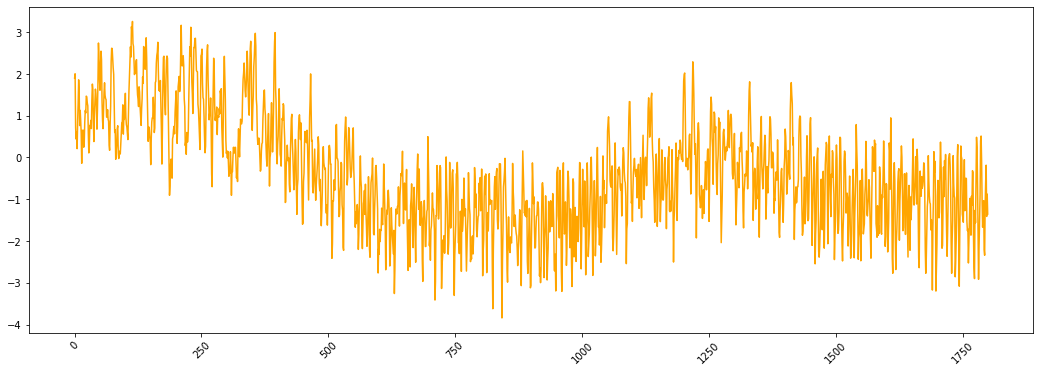

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(bladW, 'orange')
plt.xticks(rotation=45);

In [ ]:
data2 = data[data.index > 1800]
data2

,Czas [s],P1[kPa],P2[kPa],T[C],F[m^3/h],CV[%],X[%],PV[%],deltaP[kPa],sqdP
1801,1801,647.374847,342.124542,96.666667,369.597070,35.238095,33.797314,50.354090,305.250305,17.471414
1802,1802,648.595849,346.275946,96.617827,365.323565,34.798535,34.407814,49.987790,302.319903,17.387349
1803,1803,649.816850,342.124542,96.593407,363.247863,33.894994,34.456654,49.035409,307.692308,17.541160
1804,1804,640.293040,347.008547,96.642247,362.271062,32.796093,33.699634,48.962149,293.284493,17.125551
1805,1805,634.920635,350.915751,96.642247,366.666667,32.942613,33.137973,48.620269,284.004884,16.852444
...,...,...,...,...,...,...,...,...,...,...
3596,3596,634.676435,356.532357,96.617827,368.742369,34.090354,32.918193,49.084249,278.144078,16.677652
3597,3597,640.781441,353.601954,96.593407,368.498168,33.455433,33.528694,48.888889,287.179487,16.946371
3598,3598,638.827839,355.311355,96.593407,367.155067,34.188034,33.382173,49.181929,283.516484,16.837948
3599,3599,637.851038,347.496947,96.593407,367.155067,33.919414,33.137973,49.035409,290.354091,17.039780


In [ ]:
dPw = data2['deltaP[kPa]'].to_numpy()
N1 = min(dP)
S1 = (max(dP)+min(dP))/2
P1 = max(dP)

In [ ]:
Xw = data2['X[%]'].to_numpy()
N2 = min(X)
S2 = (max(X)+min(X))/2
P2 = max(X)

In [ ]:
Yw = data2['F[m^3/h]'].to_numpy()
N3 = min(Y)
S3 = (max(Y)+min(Y))/2
P3 = max(Y)

In [ ]:
#listy punktow char. dla wykresow przynaleznosci
X1w = [N1 , S1 , P1]
X1w

[199.51159899999993, 281.074481, 362.637363]

In [ ]:
X2w = [N2 , S2 , P2]
X2w

[27.912088, 32.3321125, 36.752137]

In [ ]:
Ww = [N3 , S3 , P3]
Ww

[339.80464, 371.1843715, 402.564103]

In [ ]:
FdPw ,RdPw = szukaj_punktow(dPw,bokR,bokM,X1w)
mFdPw ,mRdPw = szukaj_mniejszych(dPw,bokR,bokM,X1w)
FXw ,RXw = szukaj_punktow(Xw,bokR,bokM,X2w)
mFXw ,mRXw = szukaj_mniejszych(Xw,bokR,bokM,X2w)
print(" Wartości wieksze dP ")
print(FdPw)
print(RdPw)
print(" Wartości mniejsze dP ")
print(mFdPw)
print(mRdPw)
print(" Wartości wieksze X ")
print(FXw)
print(RXw)
print(" Wartości mniejsze X ")
print(mFXw)
print(mRXw)

 Wartości wieksze dP 
[0.7035928181154754, 0.7395209502283149, 0.6736526916741363, 0.8502994045747427, 0.9640718556266816, 0.8473053956087528, 0.733532932296336, 0.781437124794095, 0.8742515008236231, 0.9940119820680198, 0.9491017985362507, 0.904191615004482, 0.9520958075022414, 0.9730538947851302, 0.9610778466606917, 0.808383230008964, 0.7694610766696539, 0.7604790375112045, 0.7724550856356451, 0.8982035848120224, 0.9970059910340101, 0.7754490946016346, 0.7664670677036649, 0.7694610889301345, 0.9820359339435805, 0.8173652691674138, 0.8742514885631438, 0.9311377202193514, 0.9580838254342212, 0.9790419127171113, 0.934131741445821, 0.9790419127171108, 0.9580838376947001, 0.7664670677036654, 0.8832335399820717, 0.9311377202193518, 0.8802395187556025, 0.8772455097896126, 0.799401190850515, 0.9670658645926715, 0.8443113743822832, 0.733532932296336, 0.8113772512354345, 0.9850299429095704, 0.9101796329364618, 0.9550898164682313, 0.9101796451969424, 0.9131736541629323, 0.9940119698075405, 0.93

In [ ]:
ostrew, mianw ,liczw = defuz2(dPw,mFdPw, RdPw,mRdPw, Xw, RXw,mRXw,mFXw)
print(ostrew)
print(liczw)
print(mianw)

[360.33457971229285, 360.34564162186587, 359.89097563885326, 362.4734120773764, 366.4382924741651, 371.38083072670895, 378.10991251771816, 376.02421091877653, 376.3798448002815, 367.8017125321269, 369.439453387901, 365.3110232458791, 366.66097636026797, 368.5649769222259, 370.86289312685585, 365.47671002117204, 361.59184053096, 362.0999549316777, 361.2418041449286, 363.7287983183288, 366.93372928265615, 375.4794503330082, 377.6479958486874, 377.3998846513807, 368.5763385948642, 362.7893298853051, 364.4818483950911, 364.0140118084735, 368.1985824617886, 367.5836457584189, 370.78214897873636, 369.81505616547634, 370.54368299426835, 377.2561204609732, 376.42017353350855, 365.9757488257361, 365.8732453243985, 363.37319887074057, 363.0781001924266, 370.0165398505088, 374.65967927724233, 379.55665775562045, 378.1650126839858, 371.04622488756485, 364.6484276625031, 366.6843604550894, 372.58291401031295, 373.216308445759, 368.49970631783526, 366.7421347258011, 364.5993500908061, 365.3003468129

In [ ]:
import cmath
bladB = [0]*1800
bladW = [0]*1800
s = 0
for k in range(1800):
  s = ostrew[k] - Yw[k]
  if ostrew[k] == 0 or Yw[k] == 0:
    s = bladB[k-1]
  bladB[k] = s
  bladW[k] = s*100/max(Yw)
  s = 0

print(bladB)
print(bladW)

[-9.262490287707124, -4.977923378134108, -3.3568873611467325, 0.20235007737642263, -0.22837452583490858, -1.5129422732910598, 0.8205355177181559, -3.5850690812234802, -3.351535199718512, -10.830766467873104, -6.38472261209904, -8.803750754120927, -6.476996639732022, -4.206696077774097, -2.8855808731441357, -8.515963978827983, -8.127329469040035, -6.276113068322275, -6.157462855071401, -3.3041686816711717, -1.5644387173438759, 2.8298773330081985, 0.7249188486874232, -1.5988943486192966, -10.910840405135843, -12.79064611469488, -6.702522604908893, -5.827258191526482, -2.6194885382113853, -5.188027241581096, -2.600024021263664, -5.398618834523688, -5.158393005731625, -0.521657539026819, -3.1891064664914666, -14.24403117426391, -12.14873267560148, -10.375275129259421, -7.862070807573446, -0.4352301494911899, 0.17860527724235453, -0.4189222443795302, -2.90946831601417, -9.539856112435132, -12.030449337496918, -7.186213544910572, -1.8981599896870307, -3.950968554241001, -8.78967068216474, -9

In [ ]:
#sredni blad wzgledny
s = 0
for o in range(1800):
  s = s + bladW[o]
avg = s/1800
avg

-0.23981824910403535

In [ ]:
#sredni blad bezwzgledny
s = 0
for o in range(1800):
  s = s + bladB[o]
avg = s/1800
avg

-0.9264773376401163

In [ ]:
print(max(bladW))
print(min(bladW))
print(max(bladB))
print(min(bladB))

3.709343931594796
-3.7547944395700346
14.330115005737582
-14.505701583408836


In [ ]:
#odchylenie standardowe
SD = np.std(ostrew)
SD

10.448865804003573

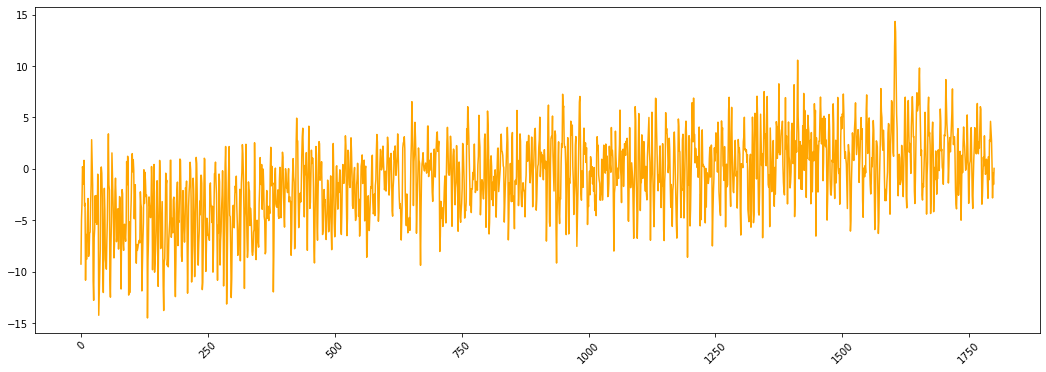

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(bladB, 'orange')
plt.xticks(rotation=45);

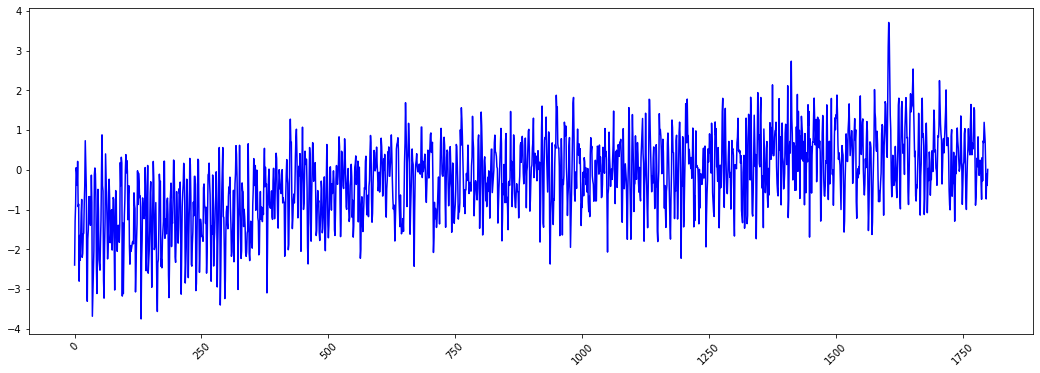

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(bladW, 'blue')
plt.xticks(rotation=45);

In [ ]:
avg = 0
for k in range(1800):
  avg += ostrew[k]
avg = avg/1800
for p in range(1800):
  if ostrew[p] == 0:
    ostrew[p] = avg

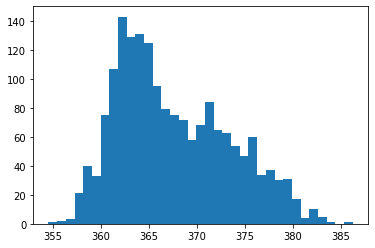

In [ ]:
plt.hist(ostrew, 35)
plt.show()

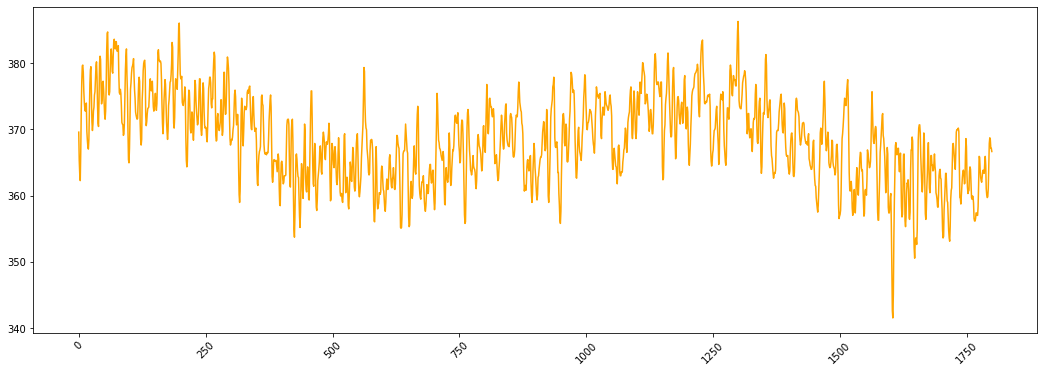

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(Yw, 'orange')
plt.xticks(rotation=45);